# Building a Neural Network from scratch

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
#!pip install mnist
import mnist
%matplotlib inline
plt.style.use('default')

# load data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
num_train_images = len(train_labels)
test_images = mnist.test_images()
test_labels = mnist.test_labels()
num_test_images = len(test_images)

# print the data dimensions
print("Train Images Shape: "+str(train_images.shape))
print("Train Labels Shape: "+str(train_labels.shape))
print('Train Images DataType: '+str(train_images.dtype))
print("Test Images Shape: "+str(test_images.shape))
print("Test Labels Shape: "+str(test_labels.shape))
print('Test Images DataType: '+str(test_images.dtype))

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Train Images DataType: uint8
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)
Test Images DataType: uint8


Examine the data:

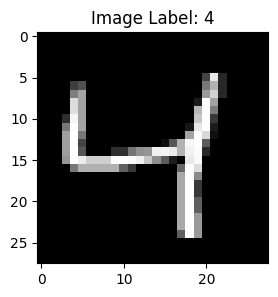

In [2]:
# display a single sample
idx = 2
plt.figure(figsize=(3,3))
plt.imshow(train_images[idx,:,:], cmap='gray')
plt.title("Image Label: "+str(train_labels[idx]));

Here is a diagram of the neural network we will build:

<img src="Network_Diagram.png" width="800">

# Build the components of the network:

The ReLU function in
\begin{equation}
ReLU(x) = 
\begin{cases} 
      0 & \textrm{if} & x < 0 \\
      x & \textrm{if} & x > 0 
\end{cases}
\end{equation}

The derivative is 
\begin{equation}
\frac{\textrm{d}ReLU(x)}{\textrm{dx}} = 
\begin{cases} 
      0 & \textrm{if} & x < 0 \\
      1 & \textrm{if} & x > 0 
\end{cases}
\end{equation}

In [3]:
# define the nonlinear ReLU function
def ReLU(x):
  return np.max((0,x))

The softmax function is
\begin{equation}
\sigma(x)=(\sigma_1(x),\sigma_2(x),...,\sigma_m(x)), \textrm{ where } \sigma_i(x)=\frac{e^{x_i}}{\sum_j e^{x_j}}.
\end{equation}
Note that the components sum to 1, so this is a probability distribution.

Observe that for $i\neq j$:
\begin{equation}
\frac{d \sigma_j(x)}{d x_i} = -\sigma_j(x)\sigma_i(x)
\end{equation}
and 
\begin{equation}
\frac{d \sigma_j(x)}{d x_j} = \sigma_j(x) - \sigma_j(x)^2
\end{equation}

In [4]:
# define the softmax function.  
# This converts a vector of K real numbers into a probability distribution of K possible outcomes. 
# It is a generalization of the logistic function to multiple dimensions, and used in multinomial logistic regression.
def softmax(inputs):
  outputs = np.exp(inputs)/np.sum(np.exp(inputs))
  return outputs

In [5]:
softmax(np.array([-1,3,12,-4]))

array([2.26004513e-06, 1.23394283e-04, 9.99874233e-01, 1.12521022e-07])

Now we can put these pieces together to make a layer in the form of a Python class.

In [6]:
# define a layer class
class FClayer:
  
  def __init__(self, numInputs, numNodes):
    self.numInputs = numInputs
    self.numNodes = numNodes
    self.weights = np.random.normal(0.0, 0.05, size=(numNodes, numInputs))
    self.biases = np.zeros(numNodes)

  def apply(self, inputs):
    if (len(inputs) != self.numInputs):
      # check here so if there is an error we get told nicely about it.
      print("WARNING: Inputs to layer wrong size for the layer.")
      output = np.zeros(self.numNodes)
      return output
    # create a vector to hour the output of the layer
    output = np.zeros(self.numNodes)
    # Apply weights and baises
    x = np.matmul(self.weights, inputs) + self.biases
    # Apply the nonlinear function to each node
    for i in range(self.numNodes):
      output[i] = ReLU(x[i])
    return output

In [7]:
layer = FClayer(5,3)

In [8]:
layer.weights

array([[ 0.00401293, -0.01112419,  0.01833628,  0.04320394,  0.06554264],
       [ 0.05429305,  0.07842699,  0.01387653, -0.02711709,  0.02638607],
       [ 0.0348334 ,  0.07608582,  0.0032317 , -0.00446765, -0.03298755]])

In [9]:
28*28

784

# Build the network:

In [10]:
# define two hidden layers and an output layer
layer1 = FClayer(28*28,90)
layer2 = FClayer(90,10)
layerFinal = softmax

In [11]:
# define the network
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    # this is a placeholder method that we will modify later.
    # for now we just set the parameters equal to themselves instead of updating them
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights
    self.layer1.biases = self.layer1.biases
    self.layer2.weights = self.layer2.weights
    self.layer2.biases = self.layer2.biases

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

# Examine the network:

In [12]:
# look at the output of each layer for a test image
idx = 0 # (use the fisrt image/observation)
out1 = network.layer1.apply(train_images[idx,:,:].flatten()/255.)
print("Layer 1 output: "+str(out1))
out2 = network.layer2.apply(out1)
print("Layer 2 output: "+str(out2))
outFinal = network.layerFinal(out2)
print("Final layer output: "+str(outFinal))

Layer 1 output: [0.34045709 0.         0.         0.         0.17459629 0.32015998
 0.24045533 0.         0.         0.         0.         0.04476143
 0.         0.85047807 0.         0.         0.         0.30722228
 0.42161464 0.         0.3008     0.10528209 0.85717074 0.
 0.         0.         0.05921985 0.5340158  0.         0.21784446
 0.         0.88209393 0.13657421 0.21141307 0.04485604 0.57916484
 0.         0.         0.21452485 0.         0.         0.37364644
 0.71012199 0.         0.         0.         1.10797381 0.63062103
 0.         0.31375373 0.         0.         0.         0.
 0.21399548 0.         0.48552898 0.         0.         0.23251537
 0.26052765 0.05466591 0.19590838 0.25601647 0.13101152 0.96480806
 0.13831309 0.         0.         0.53491273 0.39369223 0.
 0.         0.         0.         0.         0.24886952 0.80970912
 0.         0.20984795 0.         1.09165039 0.30286021 0.30541207
 0.         0.11277225 0.24246298 0.         0.22670398 0.        ]
La

In [13]:
# view the output of the network applied to a single image
# (this is the same as the output from the final layer above)
network.apply(train_images[2,:,:].flatten()/255.)

array([0.09453968, 0.11953103, 0.10404438, 0.09453968, 0.11138157,
       0.09453968, 0.09453968, 0.09453968, 0.09780492, 0.09453968])

In [14]:
# can get individual layer outputs from the network (since we saved them withing the network class in the apply method)
print("Layer 1 output: "+str(network.out1))
print("Layer 2 output: "+str(network.out2))
print("Final layer output: "+str(network.outFinal))

Layer 1 output: [0.         0.         0.         0.01440324 0.05818347 0.
 0.48185853 0.14388378 0.         0.         0.35292833 0.34359106
 0.         0.40968886 0.16609953 0.         0.27365864 0.08003866
 0.01340315 0.         0.         0.12005712 0.         0.
 0.         0.         0.08989011 0.67906005 0.39347391 0.
 0.         0.         0.6985711  0.23682248 0.         0.
 0.12577203 0.06017722 0.18608678 0.15350705 0.         0.
 0.24567109 0.45609102 0.30880816 0.10520385 0.         0.
 0.         0.05690579 0.         0.04564654 0.24857493 0.72373983
 0.         0.         0.41325683 0.5893435  0.         0.
 0.         0.25346762 0.18993929 0.17310909 0.         0.95371913
 0.26972155 0.77459279 0.22518449 0.         0.45162474 0.55216395
 0.09803907 0.         0.20705256 0.         0.3848534  0.71619308
 0.2595223  0.87978312 0.         0.64381142 0.         0.
 0.41124394 0.30436278 0.70753175 0.         0.06040002 0.22817125]
Layer 2 output: [0.         0.2345563  0.0

The weights are hard to interpret by just looking at the numbers, so we can show them as images to get some intuition.  Since this is a network for learning images, the weights formattes as an image for each node can be insightful. (NOTE:  This is just noise since these are random untrained weights, but they should be more meaningful after training.)

In [15]:
math.isqrt(10)**2

9

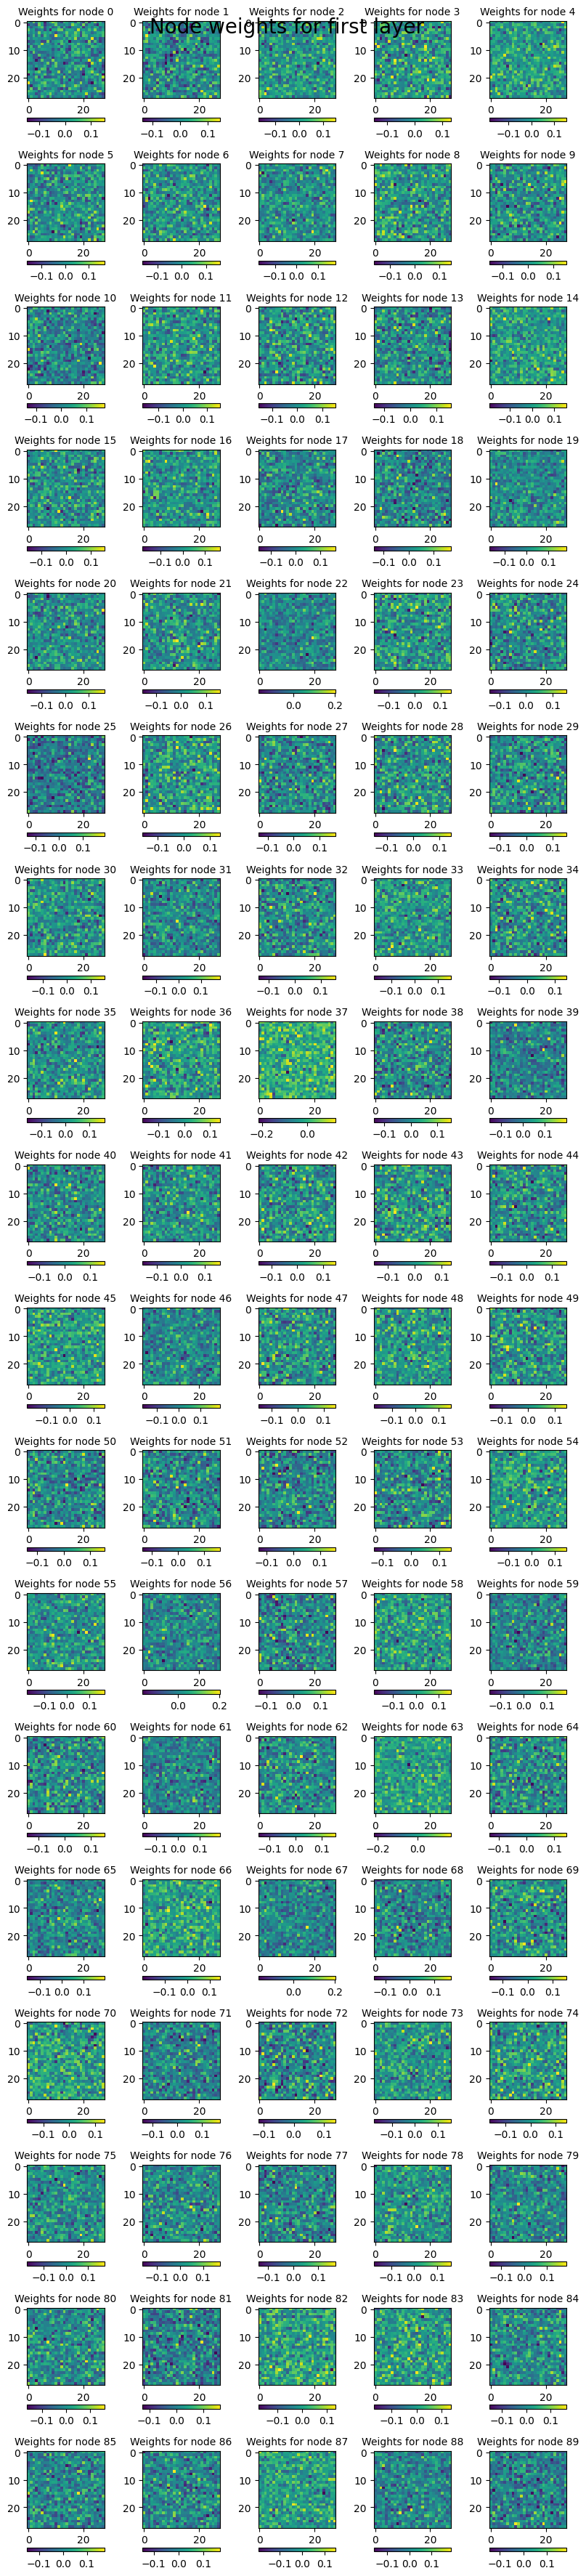

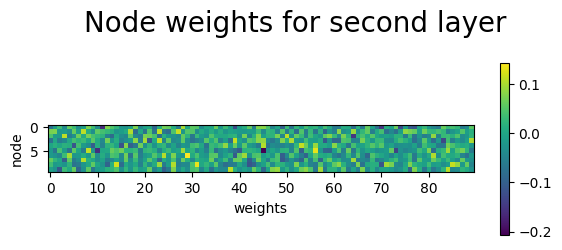

In [16]:
def NNview(layer, **kwargs):
    titleTxt = kwargs['title']
    numIn = layer.numInputs
    numNodes = layer.numNodes
    numRows = int(np.ceil(numNodes/5)) # number of rows of images
    if (numIn == math.isqrt(numIn)**2):
      plt.figure(figsize=(8,int(2*numRows)))
      plt.suptitle(titleTxt, fontsize=20)     
      for i in range(numNodes):
        plt.subplot(numRows,5,i+1) 
        imSide = int(np.sqrt(numIn))
        plt.imshow(np.reshape(layer.weights[i,:],(imSide,imSide)))
        plt.title('Weights for node '+str(i), fontsize=10)
        plt.colorbar(orientation='horizontal')
        plt.tight_layout()
    else:
      plt.figure(figsize=(6,2.5))
      plt.suptitle(titleTxt, fontsize=20)    
      plt.imshow(layer.weights)
      plt.xlabel('weights')
      plt.ylabel('node')
      plt.colorbar(orientation='vertical')
    plt.tight_layout()
    

NNview(network.layer1, title='Node weights for first layer')
NNview(network.layer2, title='Node weights for second layer')

# Training

To measure accuracy we will compare the output of the network, $\hat{y}$, on an image to the true label for the image, $y$.  We will use an accuracy measure called cross entropy.

The **cross entropy** loss function is
\begin{equation}
L(y,\hat{y}) = -\sum_i^m y_i \log(\hat{y}_i) = -(y_1 \log(\hat{y}_1) + y_2 \log(\hat{y}_2) + \cdots y_m \log(\hat{y}_m) )
\end{equation}
where $y=(y_1,y_2,...,y_m)$ is the true value and $\hat{y} = (\hat{y}_1,\hat{y}_2,...,\hat{y}_m)$ is the predicted value.

For example, if the image is of a number 5, $y=(0,0,0,0,0,1,0,0,0,0)$ and $L(y,\hat{y})=-\log(\hat{y}_5)$.  In general, for an image of a number $k$, $L(y,\hat{y})=-\log(\hat{y}_k)$.

In [17]:
# define our cross entropy loss function
def Loss(y,yHat):
  L = 0
  m = len(y)
  for i in range(m):
    # modify yHat[i] so we don't get log of zero (undefined).
    yHat[i] = max(10**(-10),yHat[i])
    L = L + y[i]*np.log(yHat[i])
  return -L

In [18]:
# compute and print cross entropy loss for a single sample
idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
yHat = network.apply(train_images[idx,:,:].flatten()/255.)
print('Cross Entropy Loss: '+str(Loss(y,yHat)))

Cross Entropy Loss: 2.358931040044963


### STEP 1:  Compute formulas for the derivatives of the Loss function with respect to the parameters in the second layer, $W^2_{i,j}$ and $b^2_i$ for $i,j \in \{0,...,9\}$.

The derivative of the cross entropy loss function is:
\begin{equation}
\frac{d L(y,\hat{y})}{d\hat{y}_i} = -\frac{y_i}{\hat{y}_i}
\end{equation}

In [19]:
# derivative of Loss function with respect to the 10 inputs
def dL_dyi(y,yHat):
  m = len(y)
  output = np.zeros(m)
  for i in range(m):
    output[i] = -y[i]/yHat[i]
  return output

print(dL_dyi(y,yHat))

[ -0.         -0.         -0.         -0.         -0.        -10.5796362
  -0.         -0.         -0.         -0.       ]


Derivative of the cross entropy loss function with respect to an output of the second hidden layer is:
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i}   =  \sum_{j=1}^m \frac{d L(y,\hat{y})}{d \hat{y}_j} \frac{d \hat{y}_j}{d x^2_i}    =  -\sum_{j=1}^m \frac{y_j}{\hat{y}_j} \frac{d \sigma_j(x^2)}{d x^2_i}
\end{equation}

[NOTE:  The exponent on the $x$ indicates the second hidden layer.  That is, $x^2_i$ is the output of the $i$-th node in the second hidden layer. Also, recall that $\hat{y}_i=\sigma_i(x)$]

(see Chain Rule: https://math.hmc.edu/calculus/hmc-mathematics-calculus-online-tutorials/multivariable-calculus/multi-variable-chain-rule/#:~:text=Multivariable%20Chain%20Rules%20allow%20us,ydydt .)

We need to derive a simple formula for this derivative.  From our previous work, for $i\neq j$:
\begin{equation}
\frac{d \sigma_j(x)}{d x_i} = -\sigma_j(x)\sigma_i(x)
\end{equation}
and 
\begin{equation}
\frac{d \sigma_j(x)}{d x_j} = \sigma_j(x) - \sigma_j(x)^2
\end{equation}

So the derivative of the cross entropy loss function with respect to the 10 inputs into the softmax: (recall $\hat{y}_i=\sigma_i(x^2)$)
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i}   =  \sum_{j=1}^m \frac{d L(y,\hat{y})}{d \hat{y}_j} \frac{d \hat{y}_j}{d x^2_i}    =   -\sum_{j=1}^m \frac{y_j}{\hat{y}_j} \frac{d \sigma_j(x^2)}{d x^2_i} = -\left( \frac{y_1}{\hat{y}_1}(-\hat{y}_1\hat{y}_i) + \cdots +  \frac{y_i}{\hat{y}_i}( \hat{y}_i-\hat{y}_i^2) + \cdots + \frac{y_m}{\hat{y}_m}(-\hat{y}_m\hat{y}_i)\right)
\end{equation}

FINALLY, cancelling terms gives that the derivative of the cross entropy loss function with respect to the output of the $i$-th node of the second hidden layer is: 
\begin{align}
\frac{d L(y,\hat{y})}{d x^2_i} &= y_1\hat{y}_i + \cdots +  y_i( \hat{y}_i-1) + \cdots + y_m\hat{y}_i \\
 &= y_1\hat{y}_i + \cdots +  y_i\hat{y}_i + \cdots + y_m\hat{y}_i - y_i
\end{align}

Since only $y_i$ equals 1 for the value of $i$ corresponding to the truth label and the rest are zero, letting $k$ be the truth value gives
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i} = \hat{y}_i - y_i
\end{equation}

ALSO SEE: https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/.

In [20]:
# derivative of Loss function with respect to the 10 outputs of the second hidden layer (x_0^2,...,x_9^2)
def dL_dx2(network,obs,y):
  yHat = network.apply(obs)
  numx2i = network.layer2.numNodes 
  dLdx2 = np.zeros(numx2i)
  k = np.where(y == 1)
  for i in range(numx2i):
    dLdx2[i] = yHat[i] - y[i]
  return dLdx2

idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
obs = train_images[idx,:,:].flatten()/255.
print(dL_dx2(network,obs,y))

[ 0.09452121  0.10386347  0.10376825  0.09452121  0.09452121 -0.90547879
  0.12072285  0.09452121  0.10451818  0.09452121]


The output of the $i$-th node in the second layer is
\begin{equation}
x^2_i = ReLU\left( b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j \right) =
\begin{cases} 
      0 & \textrm{if} & b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j < 0 \\
      b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j & \textrm{if} & b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j > 0 
\end{cases}
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the weights of the second layer is:
\begin{equation}
\frac{d x^2_i}{dW^2_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      x^1_j & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the associated bias is:
\begin{equation}
\frac{d x^2_i}{db^2_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      1 & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the output of the $j$-th node of layer 1 is:
\begin{equation}
\frac{d x^2_i}{dx^1_j} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      W^2_{i,j} & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

Combining the with previous results,
\begin{equation}
\frac{dL(y,\hat{y})}{dW^2_{i,j}} = \frac{d L(y,\hat{y})}{d x^2_i}\frac{d x^2_i}{dW^2_{i,j}} = 
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      (\hat{y}_i - y_i)x_j^1 & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}
and
\begin{equation}
\frac{dL(y,\hat{y})}{db^2_i} = \frac{d L(y,\hat{y})}{d x^2_i}\frac{d x^2_i}{db^2_i} = 
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      (\hat{y}_i - y_i) & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

In [21]:
def dL_dW2(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdW2 = np.zeros((numx2i,numx1i))
  for i in range(numx2i):
    for j in range(numx1i):
      if (network.out2[i] == 0):
        dLdW2[i,j] = 0
      else:
        dLdW2[i,j] = dLdx2[i]*network.out1[j]
  return dLdW2

def dL_db2(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  # define the variable to hold the output 
  # this is a vector the same size as the number of nodes in layer 2
  dLdb2 = np.zeros(numx2i)
  for i in range(numx2i):
    if (network.out2[i] == 0):
      dLdb2[i] = 0
    else:
      dLdb2[i] = dLdx2[i]
  return dLdb2

def dx2_dx1(network,obs,y):
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  dx2dx1 = np.zeros((numx2i,numx1i))
  for i in range(numx2i):
    for j in range(numx1i):
      if (network.out2[i] == 0):
        dx2dx1[i,j] = 0
      else:
        dx2dx1[i,j] = network.layer2.weights[i,j]
  return dx2dx1

Derivative of L with respet to the biases in the second layer: [0.         0.10386347 0.10376825 0.         0.         0.
 0.12072285 0.         0.10451818 0.        ]


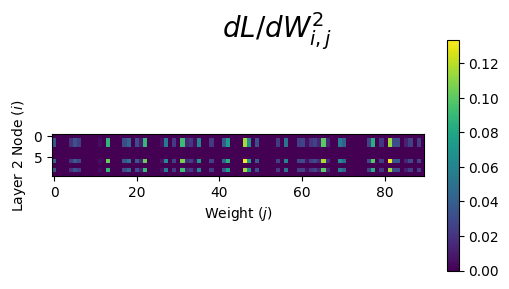

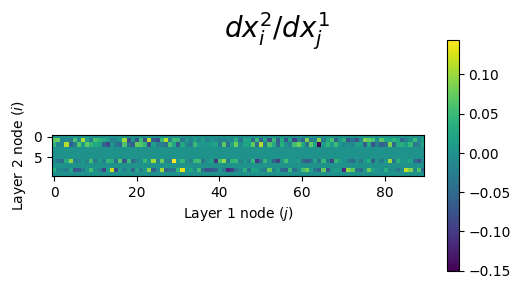

In [22]:
idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
obs = train_images[idx,:,:].flatten()/255.

dLdW2 = dL_dW2(network,obs,y)
plt.figure(figsize=(6,3))
plt.suptitle('$dL / dW^2_{i,j}$', fontsize=20)
plt.imshow(dLdW2);
plt.xlabel('Weight ($j$)')
plt.ylabel('Layer 2 Node ($i$)')
plt.colorbar(orientation='vertical');

dx2dx1 = dx2_dx1(network,obs,y)
plt.figure(figsize=(6,3))
plt.suptitle('$dx_i^2 / dx_j^1$', fontsize=20)
plt.imshow(dx2dx1);
plt.xlabel('Layer 1 node ($j$)')
plt.ylabel('Layer 2 node ($i$)')
plt.colorbar(orientation='vertical');

dLdb2 = dL_db2(network,obs,y)
print('Derivative of L with respet to the biases in the second layer: '+str(dLdb2))

### STEP 2:  Compute formulas for the derivatives of the Loss function with respect to the parameters in the first layer, $W^1_{i,j}$ and $b^1_i$ for $i \in \{0,...,30\}$ and $j \in \{0,...,784\}$.

Similar to the second layer:

The output of the $i$-th node in the first layer is
\begin{equation}
x^1_i = ReLU\left( b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j \right) =
\begin{cases} 
      0 & \textrm{if} & b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j < 0 \\
      b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j & \textrm{if} & b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j > 0 
\end{cases}
\end{equation}

The derivative of the output of the $i$-th node of layer 1 with respect to the weights of the first layer is:
\begin{equation}
\frac{d x^1_i}{dW^1_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      x_j & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}
and the derivative of the output of the $i$-th node of layer 2 with respect to the associated bias is:
\begin{equation}
\frac{d x^1_i}{db^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      1 & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

NOTE:  Note that he derivatives of the ReLU function are very simple.  This is one of the reasons we might choose this function, or a different function with similarly simple derivatives.

From the chain rule,
\begin{equation}
\frac{dL(y,\hat{y})}{dW^1_{i,j}} = \sum_{k=0}^9 \frac{d L(y,\hat{y})}{d x^2_k}\frac{d x^2_k}{d x^1_i}\frac{d x^1_i}{dW^1_{i,j}} 
\end{equation}

From our previous work, the functions for the three derivatives in the chain rule are:

\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_k} = \hat{y}_k - y_k
\end{equation}

\begin{equation}
\frac{d x^2_k}{dx^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_k = 0 \\
      W^2_{k,i} & \textrm{if} & x^2_k > 0 
\end{cases} 
\end{equation}

\begin{equation}
\frac{d x^1_i}{dW^1_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      x_j & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

Multiplying these gives:

\begin{equation}
\frac{dL(y,\hat{y})}{dW^1_{i,j}}  =  \sum_{k=0}^9 
\begin{cases} 
      0 & \textrm{if } x^2_k = 0 \textrm{ or } x^1_i = 0\\
      (\hat{y}_k - y_k) W^2_{k,i} x_j & \textrm{otherwise}
\end{cases} 
\end{equation}

In [23]:
def dL_dW1(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  numInputs = network.layer1.numInputs
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdW1 = np.zeros((numx1i,numInputs))
  for i in range(numx1i):
    for k in range(numx2i):
      if not (network.out2[k] == 0) or (network.out1[i] == 0):
        for j in range(numInputs):
          dLdW1[i,j] = dLdW1[i,j] + dLdx2[k]*network.layer2.weights[k,i]*obs[j]
  return dLdW1

Similar to the previous derivation: from the chain rule,
\begin{equation}
\frac{dL(y,\hat{y})}{db^1_{i}} = \sum_{k=0}^9 \frac{d L(y,\hat{y})}{d x^2_k}\frac{d x^2_k}{d x^1_i}\frac{d x^1_i}{b^1_{i}} 
\end{equation}

From our previous work, the functions for the three derivatives in the chain rule are:

\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_k} = \hat{y}_k - y_k
\end{equation}

\begin{equation}
\frac{d x^2_k}{dx^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_k = 0 \\
      W^2_{k,i} & \textrm{if} & x^2_k > 0 
\end{cases} 
\end{equation}

\begin{equation}
\frac{d x^1_i}{db^1_{i}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      1 & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

Multiplying these gives:

\begin{equation}
\frac{dL(y,\hat{y})}{db^1_{i}}  =  \sum_{k=0}^9 
\begin{cases} 
      0 & \textrm{if } x^2_k = 0 \textrm{ or } x^1_i = 0\\
      (\hat{y}_k - y_k) W^2_{k,i} & \textrm{otherwise}
\end{cases} 
\end{equation}

In [24]:
def dL_db1(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  numInputs = network.layer1.numInputs
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdb1 = np.zeros((numx1i))
  for i in range(numx1i):
    for k in range(numx2i):
      if not (network.out2[k] == 0) or (network.out1[i] == 0):
        dLdb1[i] = dLdb1[i] + dLdx2[k]*network.layer2.weights[k,i]
  return dLdb1

### STEP 2:  Create a method for the network that will use the derivatives to adjust the weights.

In [25]:
# define the network (this time using the )
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights - alpha*dL_dW1(network,obs,y)
    self.layer1.biases = self.layer1.biases - alpha*dL_db1(network,obs,y)
    self.layer2.weights = self.layer2.weights - alpha*dL_dW2(network,obs,y)
    self.layer2.biases = self.layer2.biases - alpha*dL_db2(network,obs,y)
    #print(dL_dW2(network,obs,y))

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

Rounds of training:

In [26]:
# make a list to hold the loss as we train
L = []

In [27]:
probability_training_single = 0
num_iters = 1000
probability_training = np.zeros(int(num_iters/20))
for i in range(num_iters):
  idx = random.randrange(num_train_images)
  y = np.zeros(10)
  y[train_labels[idx]] = 1
  obs = train_images[idx,:,:].flatten()/255.  
  network.train(obs, y, 0.0001)
  
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  L.append(Loss(y,yhat))
  probability_training_single = probability_training_single + yhat[test_labels[idx]]
  if (i % 20) == 0:
    print('Completed '+str(i)+' of '+str(num_iters))
    print('Truth: '+str(test_labels[idx])+' | Predicted Prob: '+str(yhat[test_labels[idx]]))
    print('Average Probability on Truth Class: '+str(probability_training_single/20)+' (above 0.1 is good, close to 1 is best) ')
    probability_training[int(i/20)] = probability_training_single/20
    probability_training_single = 0

Completed 0 of 1000
Truth: 8 | Predicted Prob: 0.09994605415371206
Average Probability on Truth Class: 0.004997302707685603 (above 0.1 is good, close to 1 is best) 
Completed 20 of 1000
Truth: 4 | Predicted Prob: 0.10291458146571981
Average Probability on Truth Class: 0.10316209472406049 (above 0.1 is good, close to 1 is best) 
Completed 40 of 1000
Truth: 7 | Predicted Prob: 0.09581048928199447
Average Probability on Truth Class: 0.1002501080849807 (above 0.1 is good, close to 1 is best) 
Completed 60 of 1000
Truth: 3 | Predicted Prob: 0.0915431151528867
Average Probability on Truth Class: 0.10203200446778335 (above 0.1 is good, close to 1 is best) 
Completed 80 of 1000
Truth: 1 | Predicted Prob: 0.11051626108679168
Average Probability on Truth Class: 0.10358244647678197 (above 0.1 is good, close to 1 is best) 
Completed 100 of 1000
Truth: 7 | Predicted Prob: 0.09667996609555694
Average Probability on Truth Class: 0.09975814419520992 (above 0.1 is good, close to 1 is best) 
Completed 1

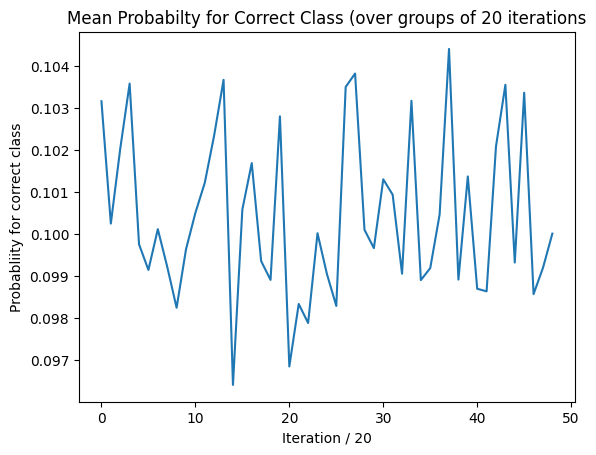

In [28]:
plt.plot(probability_training[1:])
plt.xlabel('Iteration / 20')
plt.ylabel('Probabliity for correct class')
plt.title('Mean Probabilty for Correct Class (over groups of 20 iterations');

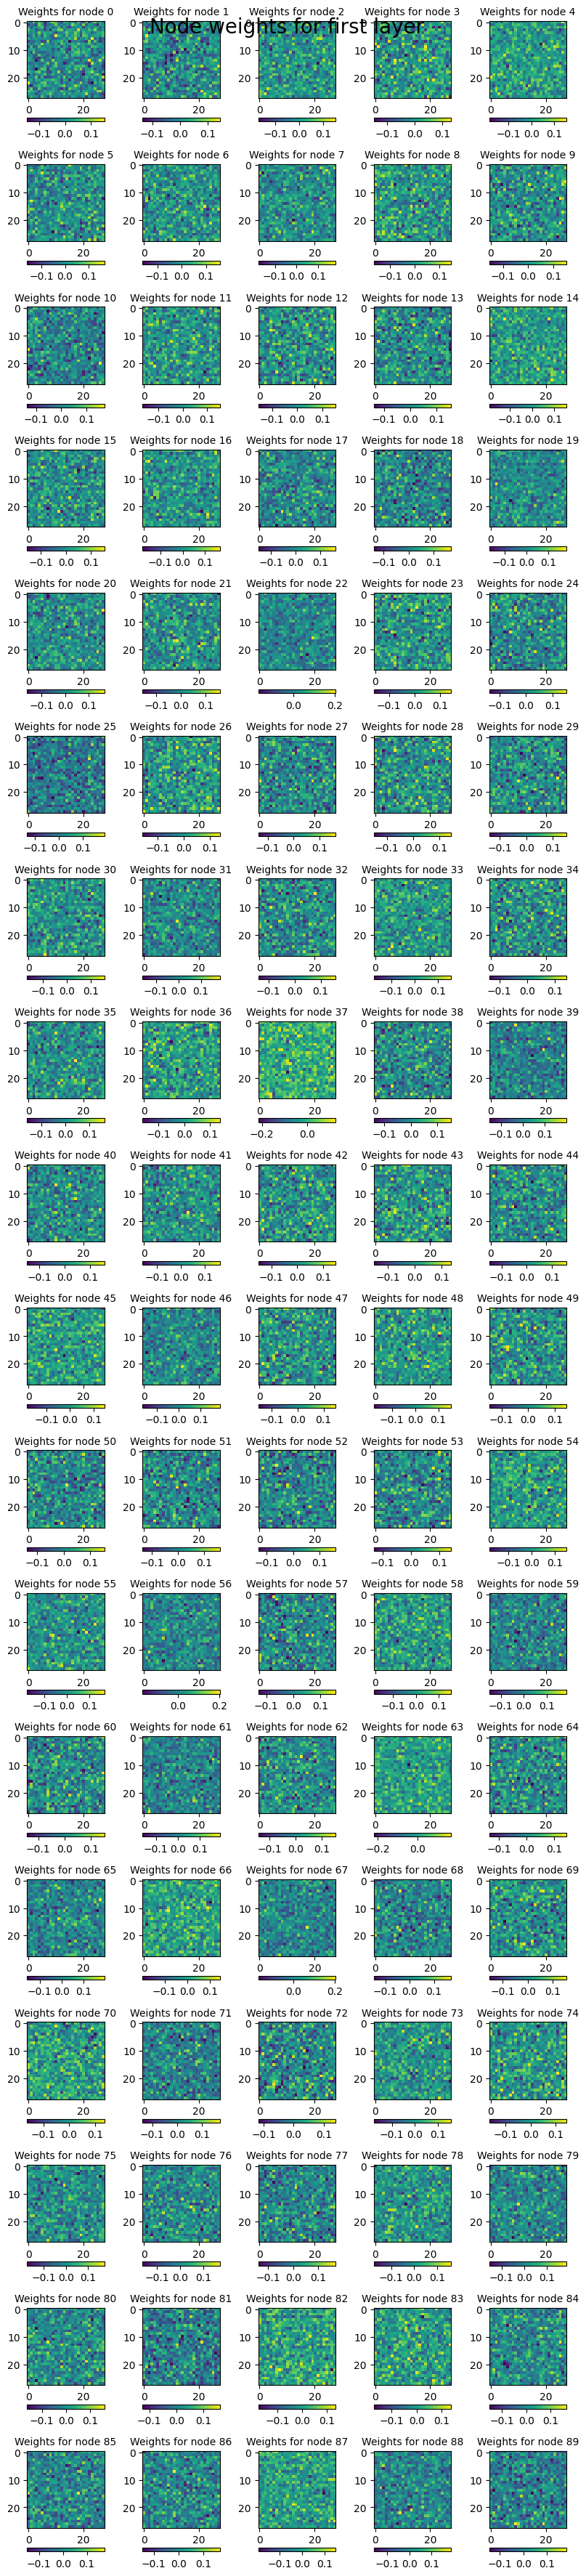

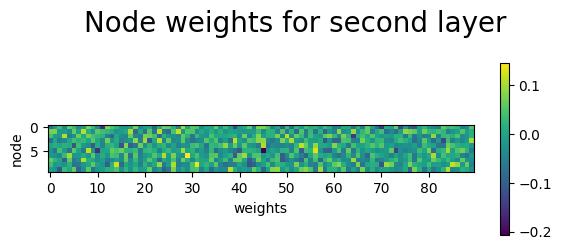

In [29]:
NNview(network.layer1, title='Node weights for first layer')
NNview(network.layer2, title='Node weights for second layer')

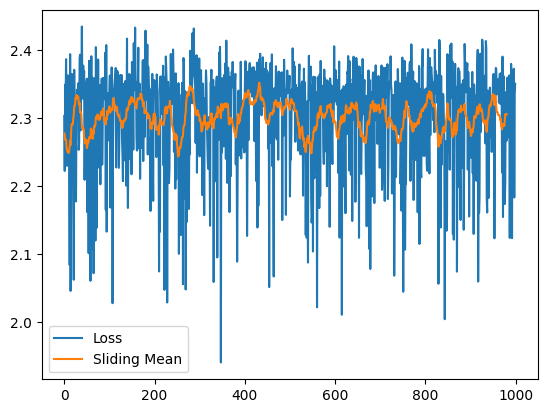

In [30]:
N = 20
plt.plot(L, label='Loss')
plt.plot(np.convolve(L, np.ones(N)/N, mode='valid'), label='Sliding Mean')
plt.legend()

Accuracy: 0.145


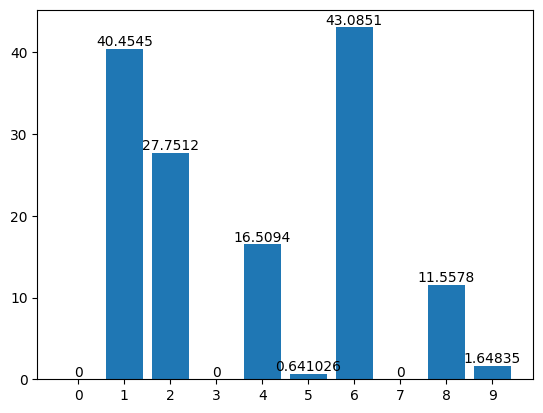

In [31]:
NumCorrect = np.zeros(10)
Num = np.zeros(10)

for idx in range(2000):
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  Num[test_labels[idx]] = Num[test_labels[idx]] + 1
  if (test_labels[idx] == np.argmax(yhat)):
    NumCorrect[test_labels[idx]] = NumCorrect[test_labels[idx]] + 1

print('Accuracy: '+str(np.sum(NumCorrect)/np.sum(Num)))
accuracy = NumCorrect/Num
bars = plt.bar(['0','1','2','3','4','5','6','7','8','9'], accuracy*100)
plt.bar_label(bars);

# Add MiniBatch Training

In [32]:
# define the network (this time using the )
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights - alpha*dL_dW1(network,obs,y)
    self.layer1.biases = self.layer1.biases - alpha*dL_db1(network,obs,y)
    self.layer2.weights = self.layer2.weights - alpha*dL_dW2(network,obs,y)
    self.layer2.biases = self.layer2.biases - alpha*dL_db2(network,obs,y)
  
  def trainMiniBatch(self, obs_list, y_list, alpha):
    self.batch_size = len(y_list)
    deltaL_dW1 = 0
    deltaL_db1 = 0
    deltaL_dW2 = 0
    deltaL_db2 = 0
    for i in range(self.batch_size):
      y = y_list[i]
      obs = obs_list[i]
      deltaL_dW1 = deltaL_dW1 + dL_dW1(network,obs,y)
      deltaL_db1 = deltaL_db1 + dL_db1(network,obs,y)
      deltaL_dW2 = deltaL_dW2 + dL_dW2(network,obs,y)
      deltaL_db2 = deltaL_db2 + dL_db2(network,obs,y)
      #print(dL_dW1(network,obs,y))
    self.layer1.weights = self.layer1.weights - alpha*deltaL_dW1/self.batch_size
    self.layer1.biases = self.layer1.biases - alpha*deltaL_db1/self.batch_size
    self.layer2.weights = self.layer2.weights - alpha*deltaL_dW2/self.batch_size
    self.layer2.biases = self.layer2.biases - alpha*deltaL_db2/self.batch_size
    #print(deltaL_dW1)
    #print(deltaL_db1)
    #print(deltaL_dW2)
    #print(deltaL_db2)

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

In [33]:
# make a list to hold the loss as we train
L = []

In [34]:
num_iters = 50
batch_size = 20
for i in range(num_iters):
  batch_idx = np.random.randint(0, high=num_train_images, size=batch_size)
  y_list = []
  obs_list = []
  for idx in batch_idx:
    y = np.zeros(10)
    y[train_labels[idx]] = 1
    y_list.append(y)
    obs = train_images[idx,:,:].flatten()/255.  
    obs_list.append(obs)
  network.trainMiniBatch(obs_list, y_list, 1)
  
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  L.append(Loss(y,yhat))
  print('Completed '+str(i)+' of '+str(num_iters), end = '')
  print(' -- Truth: '+str(test_labels[idx])+' | Predicted Prob: '+str(yhat[test_labels[idx]]))

Completed 0 of 50 -- Truth: 2 | Predicted Prob: 0.0836364052437418
Completed 1 of 50 -- Truth: 5 | Predicted Prob: 0.1
Completed 2 of 50 -- Truth: 9 | Predicted Prob: 0.062397858709526535
Completed 3 of 50 -- Truth: 5 | Predicted Prob: 0.08606727799200019
Completed 4 of 50 -- Truth: 2 | Predicted Prob: 0.06749172806492783
Completed 5 of 50 -- Truth: 6 | Predicted Prob: 0.5821006475122846
Completed 6 of 50 -- Truth: 5 | Predicted Prob: 0.09546168038888672
Completed 7 of 50 -- Truth: 6 | Predicted Prob: 0.1822028357142655
Completed 8 of 50 -- Truth: 6 | Predicted Prob: 0.10596458649976752
Completed 9 of 50 -- Truth: 7 | Predicted Prob: 0.28263720147570104
Completed 10 of 50 -- Truth: 1 | Predicted Prob: 0.11168291109206138
Completed 11 of 50 -- Truth: 9 | Predicted Prob: 0.07677933161908967
Completed 12 of 50 -- Truth: 8 | Predicted Prob: 0.03357984386716105
Completed 13 of 50 -- Truth: 1 | Predicted Prob: 0.11720520919133269
Completed 14 of 50 -- Truth: 7 | Predicted Prob: 0.09472591218

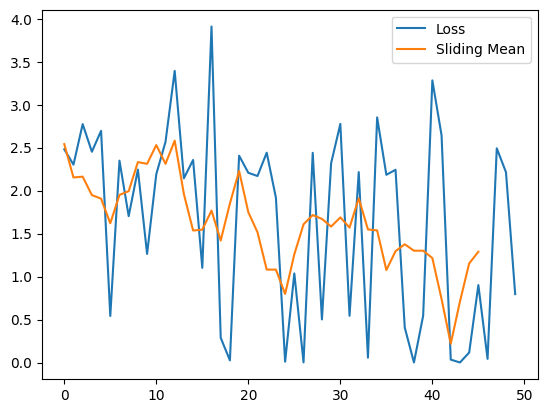

In [35]:
N = 5
plt.plot(L, label='Loss')
plt.plot(np.convolve(L, np.ones(N)/N, mode='valid'), label='Sliding Mean')
plt.legend()

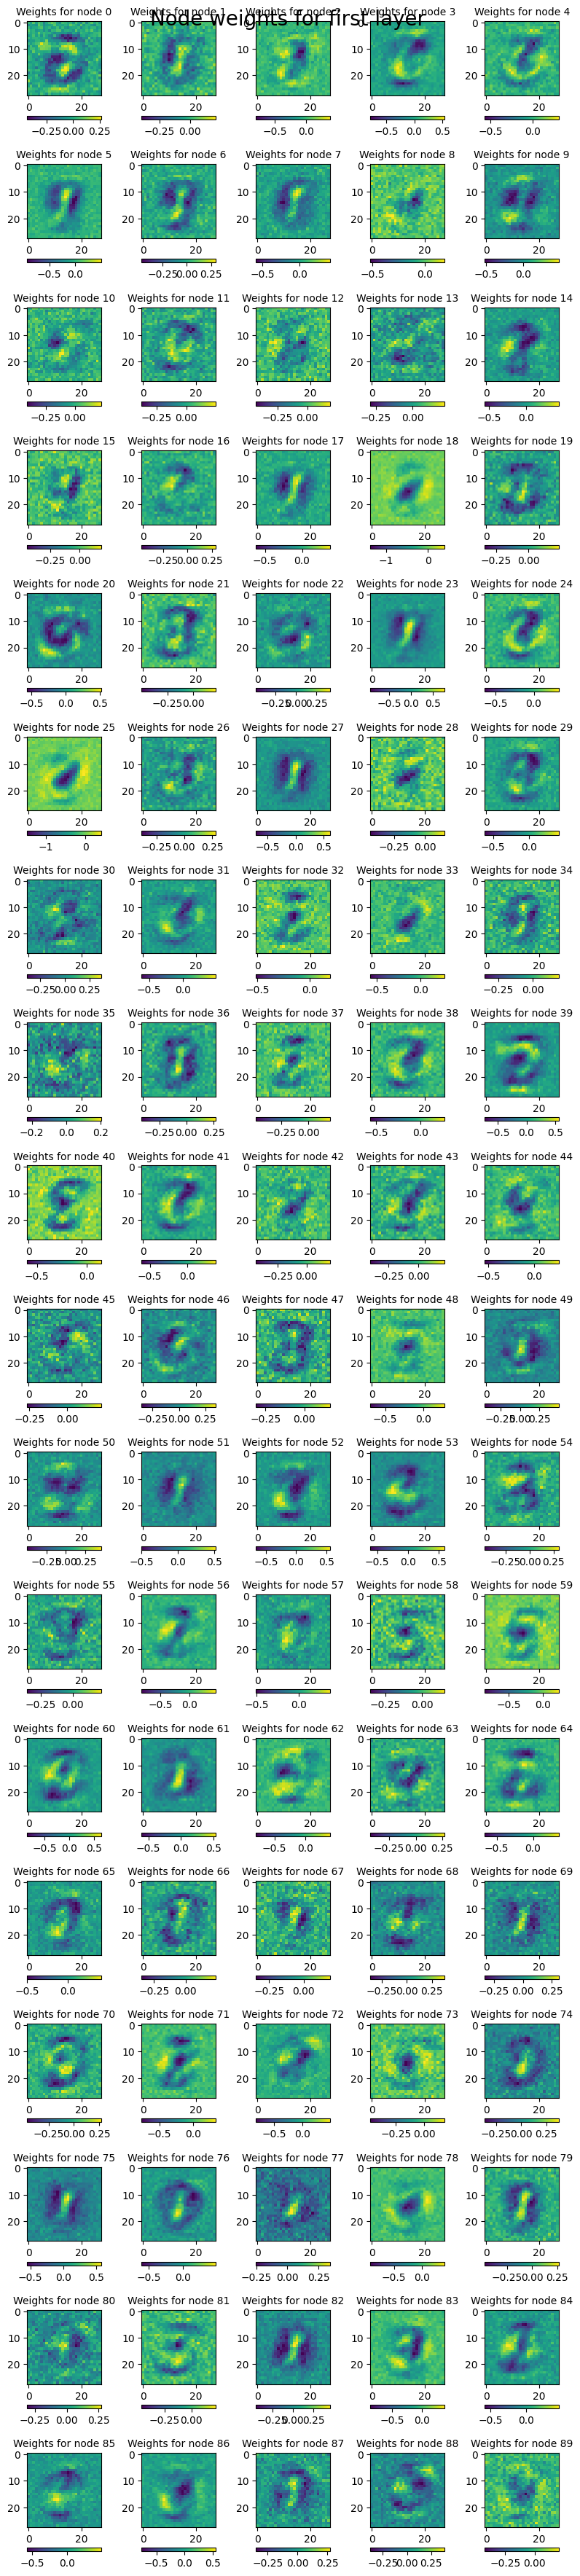

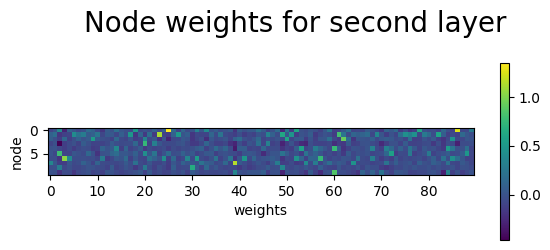

In [36]:
NNview(network.layer1, title='Node weights for first layer')
plt.savefig('20k_iterations_node_weights1.png')
NNview(network.layer2, title='Node weights for second layer')
plt.savefig('20k_iterations_node_weights2.png')

Accuracy: 0.6135


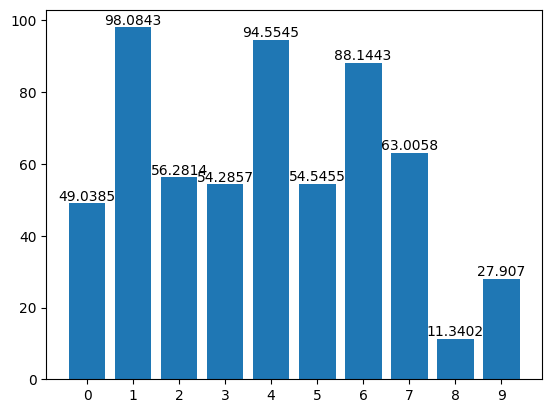

In [37]:
NumCorrect = np.zeros(10)
Num = np.zeros(10)

for idx in range(2000):
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  Num[test_labels[idx]] = Num[test_labels[idx]] + 1
  if (test_labels[idx] == np.argmax(yhat)):
    NumCorrect[test_labels[idx]] = NumCorrect[test_labels[idx]] + 1

print('Accuracy: '+str(np.sum(NumCorrect)/np.sum(Num)))
accuracy = NumCorrect/Num
bars = plt.bar(['0','1','2','3','4','5','6','7','8','9'], accuracy*100)
plt.bar_label(bars);